In [1]:
import pandas as pd 
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("Loan_Prediction.csv")

In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
#Yaha 13 columns hai some of them are object type and some of them are float type 

In [12]:
data_without_id=data.drop(["Loan_ID"],axis=1)

In [13]:
data_without_id.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
obj_cols=[]
numerical_cols=[]
for col in data_without_id.columns:
    if(data_without_id[col].dtype!=object):
        numerical_cols.append(col)
    else:
        obj_cols.append(col)

In [20]:
data[obj_cols].describe(include=["Object"])

TypeError: data type 'Object' not understood

<Axes: >

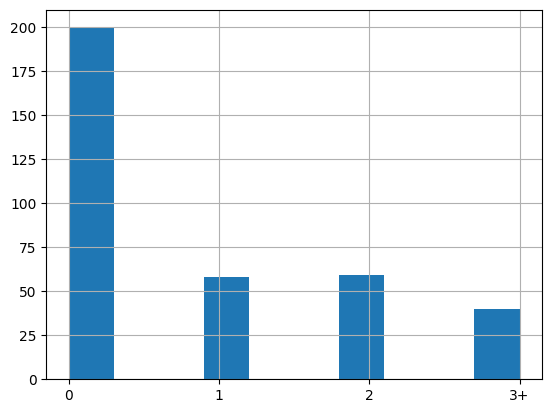

In [22]:
data["Dependents"].hist()

In [23]:
 data[numerical_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


<Axes: >

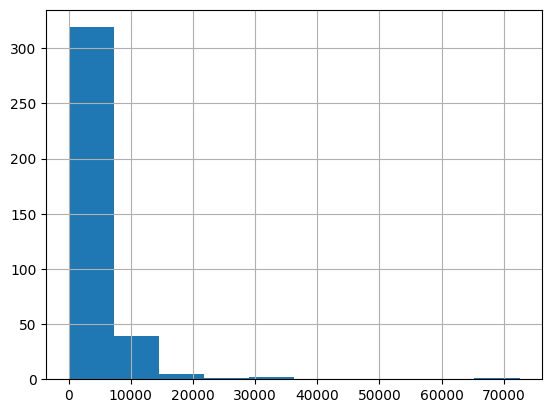

In [24]:
data["ApplicantIncome"].hist()

C:\Users\Srija\AppData\Local\Temp\ipykernel_9292\1984816545.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_id["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

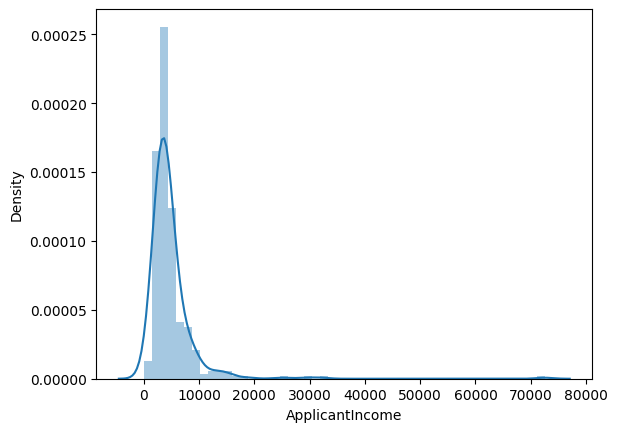

In [29]:
sns.distplot(data_without_id["ApplicantIncome"])

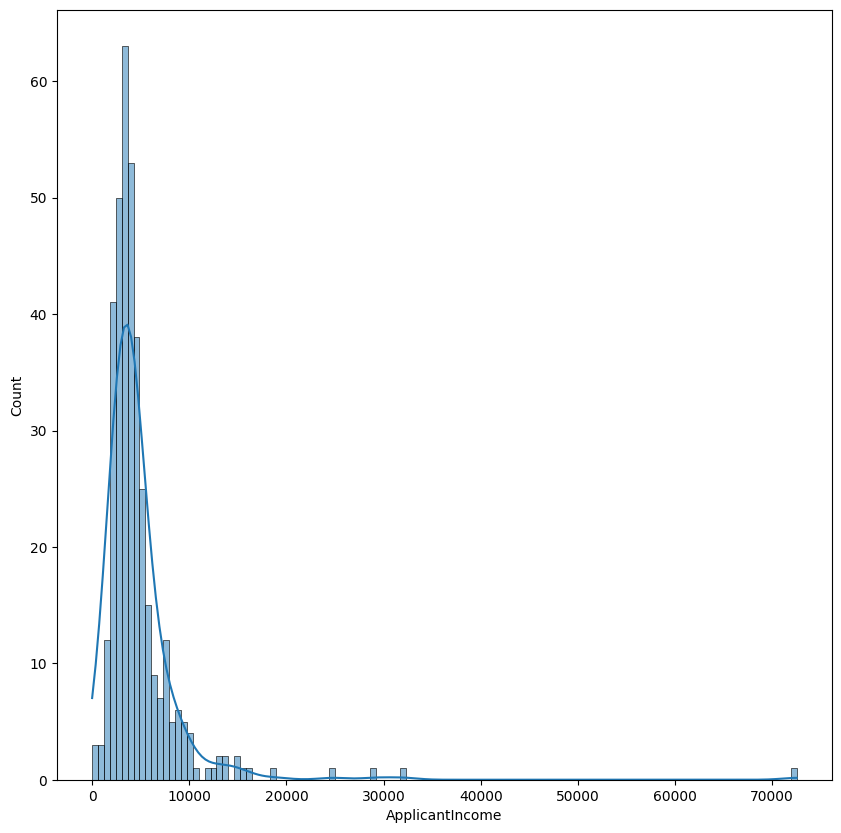

In [28]:

plt.figure(figsize=(10, 10))
sns.histplot(data_without_id["ApplicantIncome"], kde=True)
plt.show()

In [35]:
data_without_id.groupby{"Loan_Status"}["ApplicantIncome"].mean()

SyntaxError: invalid syntax (3486785291.py, line 1)

In [34]:
data[obj_cols].describe(include=["object"])


,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,356,367,357,367,344,367
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Urban
freq,286,233,200,283,307,140


In [37]:
data_without_id.forupby("Loan Status").apply(
    lambda r:(r["CoapplicantIncome"]+r["ApplicantIncome"]).mean()
)
    

AttributeError: 'DataFrame' object has no attribute 'forupby'

In [38]:
bins=[0,2500,4000,6000,8000]
groups=["low","avg","high","vhigh","vvhigh"]

In [39]:
data_without_id["Applicant_income_class"]=pd.cut(data_without_id["ApplicantIncome"],bins,labels=groups)

ValueError: Bin labels must be one fewer than the number of bin edges